In [1]:
import time
from zipfile import ZipFile
import pandas as pd
import numpy as np
from progressbar import ProgressBar, Bar, Percentage
import os
import cv2
from PIL import Image

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

from sklearn.model_selection import train_test_split

In [2]:
with ZipFile('xray_images.zip', 'r') as zip_ref:
    zip_ref.extractall('xray_images')

In [3]:
def encode_images():
    filenames = []
    X = []

    directories = ['xray_images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/', 
                  'xray_images/Montgomery/MontgomerySet/CXR_png/']
    n_files = 0

    for directory in directories:
        n_files += len(os.listdir(directory))

    counter = 0

    bar = ProgressBar(maxval=n_files+1, widgets=[Bar('=', '[', ']'), ' ', Percentage()])
    bar.start()

    for directory in directories:
        for filename in os.listdir(directory):
            if filename.endswith('.png'):
                filenames.append(filename)
                X.append(cv2.imread(directory + filename))
                counter += 1
                bar.update(counter)

    bar.finish()

    y = [int(filename[-5]) for filename in filenames]
    
    return X, y

In [4]:
X, y = encode_images()

[========================================================================] 100%


In [5]:
def plot_dimensions(X):
    widths = [i.shape[0] for i in X]
    heights = [i.shape[1] for i in X]
    depths = [i.shape[2] for i in X]
    
    dimensions = [widths, heights, depths]
    xlabels = ['width (pixels)', 'height (pixels)', 'depth (rgb)']
    
    fig = plt.figure(figsize=(14, 4))
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Avenir'
    for i in range(len(dimensions)):
        print((min(dimensions[i]), max(dimensions[i])), min(dimensions[i]) == max(dimensions[i]))
        ax = fig.add_subplot(1, 3, i+1)
        ax.hist(dimensions[i], bins=20)
        ax.set_xlabel(xlabels[i], fontsize=14)
    
    plt.show()

(948, 4892) False
(1130, 4892) False
(3, 3) True


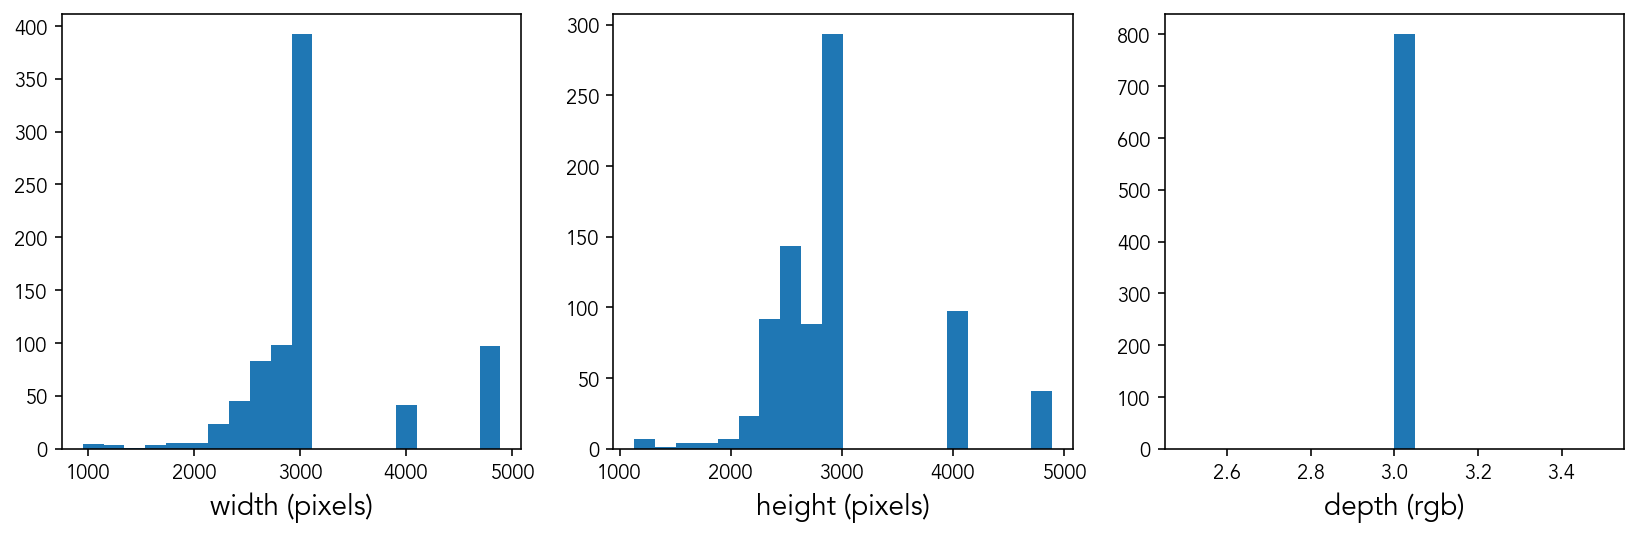

In [6]:
plot_dimensions(X)

In [7]:
widths = [i.shape[0] for i in X]
heights = [i.shape[1] for i in X]
min(min(widths), min(heights))

948

In [8]:
def resize_encode_images():
    filenames = []
    X = []

    directories = ['xray_images/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/', 
                  'xray_images/Montgomery/MontgomerySet/CXR_png/']
    n_files = 0

    for directory in directories:
        n_files += len(os.listdir(directory))

    counter = 0

    bar = ProgressBar(maxval=n_files+1, widgets=[Bar('=', '[', ']'), ' ', Percentage()])
    bar.start()

    for directory in directories:
        for filename in os.listdir(directory):
            if filename.endswith('.png'):
                filenames.append(filename)
                img = Image.open(directory + filename)
                img = img.resize((1024, 1024))
                img.save(directory + filename)
                X.append(cv2.imread(directory + filename))
                counter += 1
                bar.update(counter)

    bar.finish()

    y = [int(filename[-5]) for filename in filenames]
    
    return X, y

In [9]:
X, y = resize_encode_images()

[========================================================================] 100%


(1024, 1024) True
(1024, 1024) True
(3, 3) True


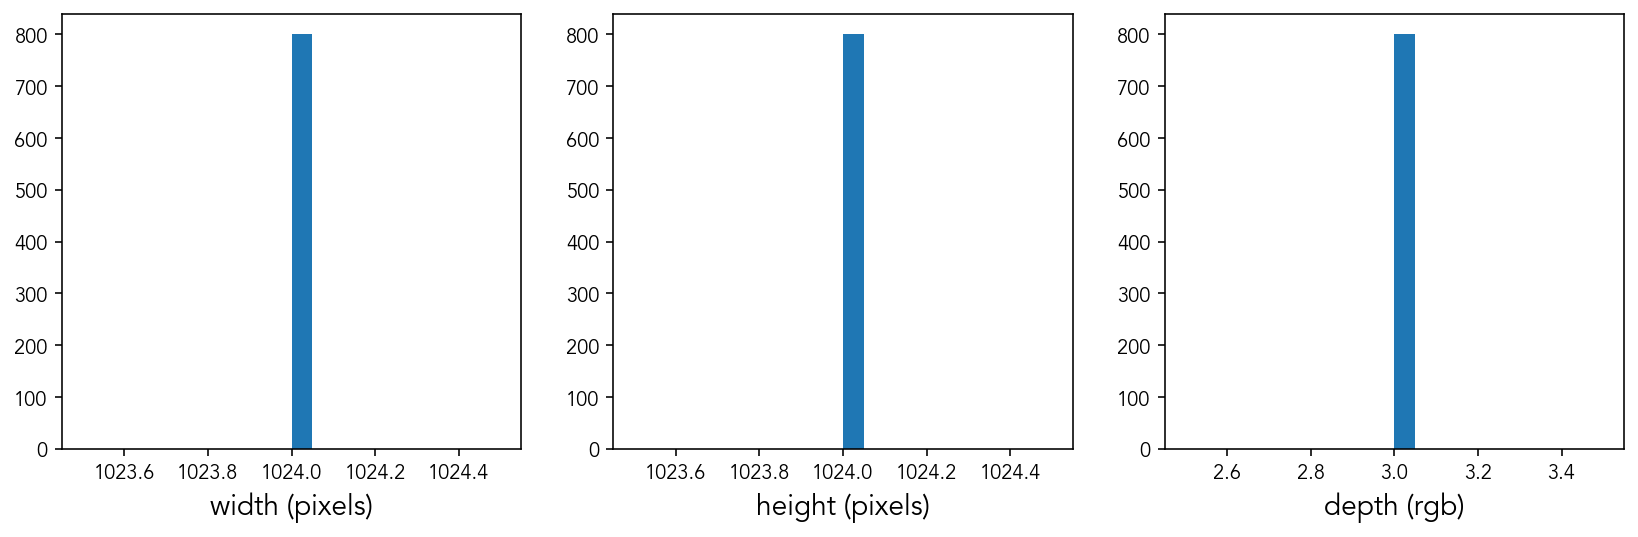

In [10]:
plot_dimensions(X)

In [11]:
set(y) == {0, 1}

True

In [12]:
np.mean(y)

0.4925

In [13]:
y_counts = dict()
for i in tuple(set(y)):
    y_counts[i] = y.count(i)

In [14]:
def plot_target(y):
    y_counts = dict()
    for i in tuple(set(y)):
        y_counts[i] = y.count(i)
    
    fig = plt.figure(figsize=(8, 8))
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Avenir'
    ax = fig.add_subplot(1, 1, 1)
    ax.pie(y_counts.values(), startangle=90, colors=['lightblue', 'steelblue'], 
          explode=(0.05, 0), autopct='%.2f%%', wedgeprops={'linewidth': 1, 'edgecolor': 'black'}, 
          textprops={'fontsize': 18, 'fontweight': 'bold'})
    circle1 = Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markeredgecolor='black', 
                     markersize=22)
    circle2 = Line2D([0], [0], marker='o', color='w', markerfacecolor='steelblue', markeredgecolor='black', 
                     markersize=22)
    ax.legend(labels=y_counts.keys(), handles=[circle1, circle2], fontsize=18, framealpha=0)
    
    plt.show()

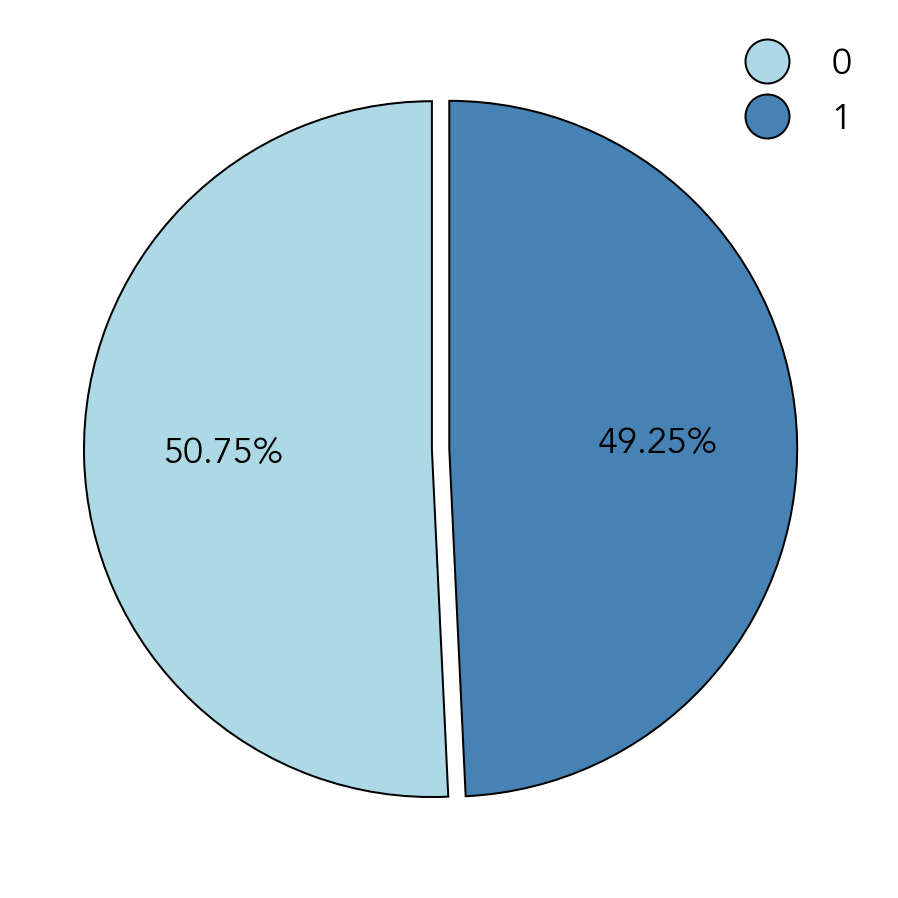

In [15]:
plot_target(y)

In [16]:
train_size = 0.6
val_size = 0.2
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(val_size + test_size), random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=(test_size / (val_size + test_size)), 
                                                random_state=42)

print(len(X_train), len(X_val), len(X_test))
print(len(y_train), len(y_val), len(y_test))

480 160 160
480 160 160
